In [1]:
import numpy as np
import matplotlib.pyplot as plt


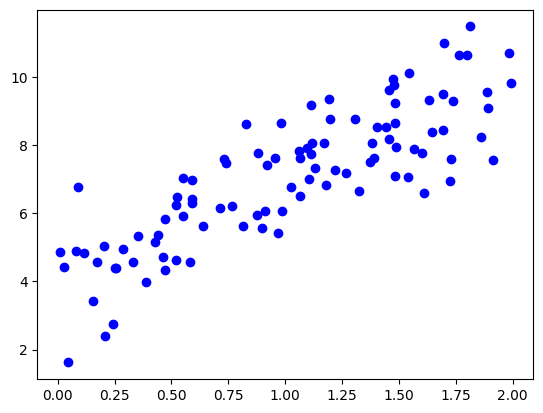

In [2]:
x=2*np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)
plt.scatter(x, y, color='blue', label='Data')

plt.show()

In [11]:
def gd(x,y,alpha=0.1,iter=100):
    cost=[]
    theta_0=0
    theta_1=0
    n=len(x)
    for _ in range(iter):
        y_pred=theta_0+theta_1*x
        d_theta_0 = (-2/n) * sum(y-y_pred)
        d_theta_1 = (-2/n )* sum((y-y_pred)*x)
        cost.append((1/n)*np.sum((y_pred-y)**2))
        theta_0 = theta_0 - alpha  *d_theta_0
        theta_1 = theta_1 - alpha  *d_theta_1
        
    return theta_0,theta_1,cost
        
        

[2.91113965] [3.15551484]


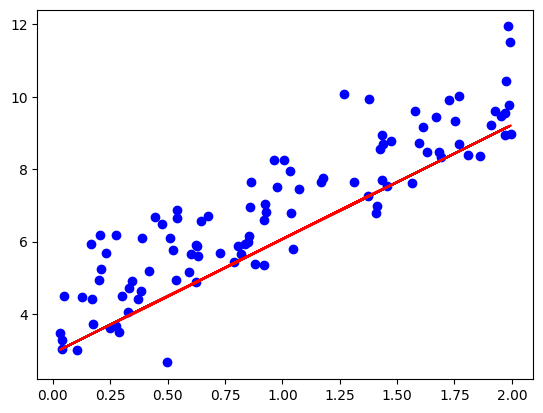

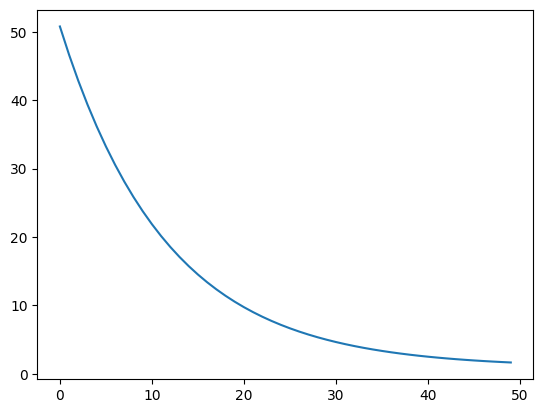

In [20]:
x=2*np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)
plt.scatter(x, y, color='blue', label='Data')
theta_0,theta_1,cost= gd(x,y,0.01,50)
print(theta_0,theta_1)

y_pred=theta_0 + theta_1 * x
plt.plot(x, y_pred, color='red', label='pred')
plt.show()
plt.plot(cost)

In [29]:
def gd(x,y,alpha=0.1,iter=100):
    cost=[]
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    n=len(x)
    for _ in range(iter):
        y_pred=theta_0+theta_1*x
        d_theta_0 = (-2/n) * sum(y-y_pred)
        d_theta_1 = (-2/n )* sum((y-y_pred)*x)
        cost.append((1/n)*np.sum((y_pred-y)**2))
        theta_0 = theta_0 - alpha  *d_theta_0
        theta_1 = theta_1 - alpha  *d_theta_1
        trajectory.append((theta_0, theta_1))
        
    return theta_0,theta_1,cost,trajectory

In [23]:
def mse_loss(w0, w1, X, y):
    y_pred = w0 + w1 * X
    return np.mean((y - y_pred) ** 2)

3.6529864883271754 3.2887680746369066


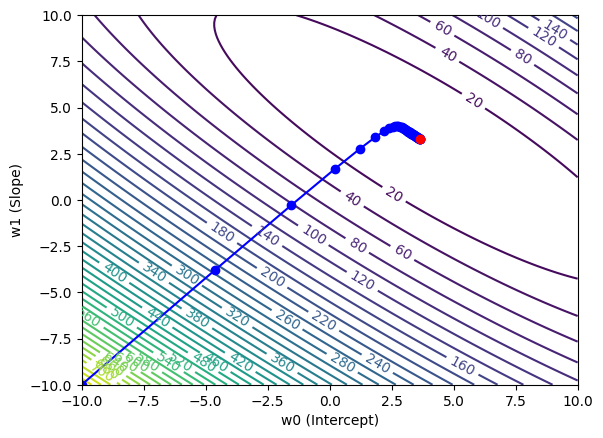

In [32]:
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)
theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])
#plt.scatter(t0,t1)
theta_0,theta_1,cost,trajectory=gd(x,y,alpha=0.1,iter=50)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


In [36]:
def SGD(x,y,alpha=0.1,iter=100):
    cost=[]
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    
    for _ in range(iter):
        idx=np.random.randint(0, len(y))
        x_i=x[i]
        y_i=y[i]
        y_pred_i=theta_0+theta_1*x_i
        cost.append( np.sum((y_pred_i - y)**2))
        d_theta_0 = (-2) * (y_i - y_pred_i)
        d_theta_1 = (-2) * ((y_i - y_pred_i) * x_i)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
    return theta_0,theta_1,cost,trajectory
        
        
        
    

2.970410497036974 3.442995799054952


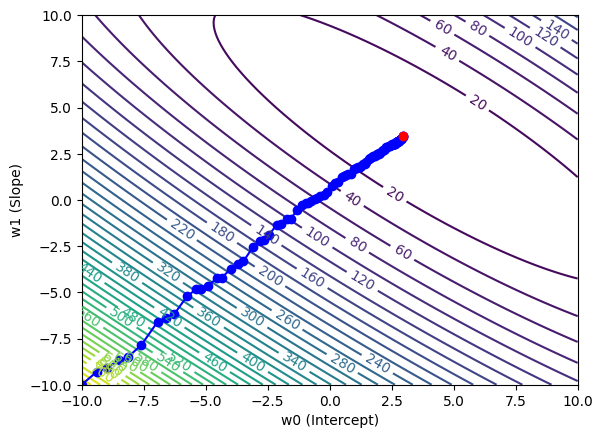

In [39]:
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)
theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])
#plt.scatter(t0,t1)
theta_0,theta_1,cost,trajectory=SGD(x,y,alpha=0.01,iter=100)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


In [40]:
def SGD_Mini(x,y,alpha=0.1,iter=100,batch_size=3):
    cost=[]    
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    
    for _ in range(iter):
        batch_indices = np.random.choice(len(y), size=batch_size, replace=False)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
       
        y_pred=theta_0+theta_1*x_batch      
        
        cost.append((1/batch_size) * np.sum((y_pred - y_batch)**2))
        d_theta_0 = (-2/batch_size) * sum(y_batch - y_pred)
        d_theta_1 = (-2/batch_size) * sum((y_batch - y_pred) * x_batch)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
        
    return theta_0,theta_1,cost,trajectory

2.533479058512953 3.972785996473283


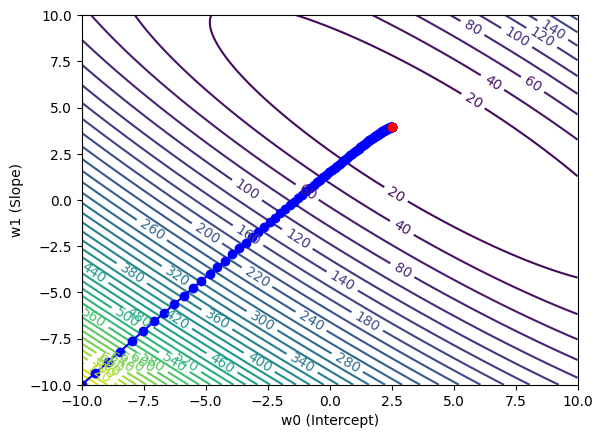

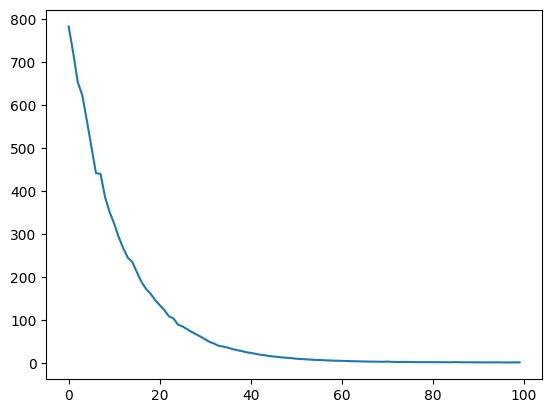

In [47]:
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)
theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])
#plt.scatter(t0,t1)
theta_0,theta_1,cost,trajectory=SGD_Mini(x,y,alpha=0.01,iter=100,batch_size=500)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
plt.plot(cost)

In [53]:
def GD_multi(x,y,alpha=0.1,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient      
        
    return theta

In [49]:
def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))

In [52]:
n_sample=500000
X = 2 * np.random.rand(n_sample, 3) 
y = 4 + X.dot(np.array([3, 1.5, 2])) + np.random.randn(n_sample)
X_bias=add_bias_feature(X)
X_bias

array([[1.        , 1.81800416, 1.54498461, 0.86782841],
       [1.        , 1.88228771, 1.92167107, 0.66186866],
       [1.        , 1.58786268, 1.72149885, 1.54853162],
       ...,
       [1.        , 1.84332035, 0.59993486, 0.15237688],
       [1.        , 1.10488238, 1.1850602 , 1.70136002],
       [1.        , 1.71535202, 0.63000271, 0.83163126]])

In [57]:
%%time
theta=GD_multi(X,y,iter=1000)
print(theta)

[4.19886084 2.70060307 3.19994435]
CPU times: total: 406 ms
Wall time: 4.17 s


In [55]:
def SGD_multi(x,y,alpha=0.1,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        i=np.random.randint(0, n_samples)
        x_i=x[i]
        y_i=y[i]
        y_pred=x_i.dot(theta)
        gradient = (2 ) * x_i.T.dot(y_pred - y_i)        
        theta = theta - alpha * gradient      
        
    return theta

In [58]:
%%time
theta=SGD_multi(X,y,iter=1000)
print(theta)

[5.02063421 3.49642221 3.58392369]
CPU times: total: 0 ns
Wall time: 12.6 ms


In [61]:
def GD_multi(x,y,alpha=0.1,iter=100):
    
    n_samples, n_features = x.shape  
       
    theta = np.zeros(n_features)    
    trajectory=[theta]
    for t in range(1,iter+1):
        alpha=1/t
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient   
        trajectory.append(theta)
        
    return theta,trajectory

In [63]:
def GD_multi(x,y,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
    
    for t in range(1,iter+1):
        alpha=1/t
        
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient
        
        
    return theta

In [64]:
%%time
n_points = 5000

X = 2 * np.random.rand(n_sample, 3) 
y = 4 + X.dot(np.array([3, 1.5, 2])) + np.random.randn(n_sample)

theta=GD_multi(X,y,iter=300)
print(theta)

[4.19348884 2.7052247  3.20046118]
CPU times: total: 328 ms
Wall time: 1.79 s


In [68]:
def gradient_descent(x,y,iter=100,beta=0.3):    
    cost=[]
    theta_0=-10
    theta_1=-10
    trajectory = [(theta_0, theta_1)]
    n=len(x)
    for t in range(1,iter+1):
        alpha=0.1/t**beta
        y_pred=theta_0+theta_1*x
        cost.append((1/n) * np.sum((y_pred - y)**2))
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)
        
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        trajectory.append((theta_0, theta_1))
        
        
    return theta_0,theta_1,trajectory,cost

2.1680622842360924 3.700868185449946


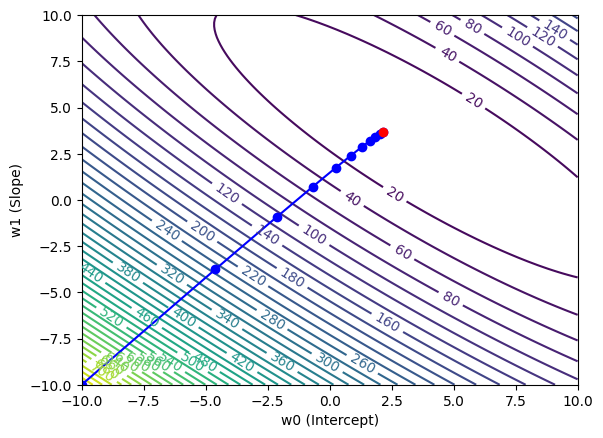

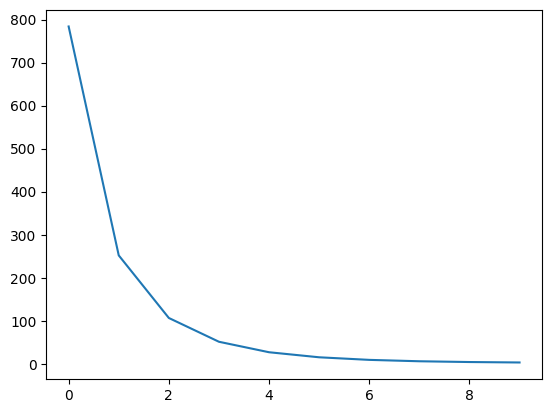

In [71]:
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])

theta_0,theta_1,trajectory,cost=gradient_descent(x,y,iter=10,beta=0.3)
print(theta_0,theta_1)
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

plt.plot(cost)

In [90]:
def z_score_scaling(data):    
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)  
    std_dev=1
    scaled_data = (data - mean) / std_dev
    return scaled_data

In [91]:
data = np.array([[1, 20,10], [2, 30,40], [3, 40,50], [4, 50,70]])
print(data)
d=z_score_scaling(data)
d

[[ 1 20 10]
 [ 2 30 40]
 [ 3 40 50]
 [ 4 50 70]]


array([[ -1.5, -15. , -32.5],
       [ -0.5,  -5. ,  -2.5],
       [  0.5,   5. ,   7.5],
       [  1.5,  15. ,  27.5]])

In [89]:
np.sum(data,axis=0)

array([ 2.5, 35. , 42.5])

In [95]:
def GD_multi(x,y,alpha=0.001,iter=100):
    n_samples, n_features = x.shape  
    
    theta = np.array([-7,-10])
    trajectory = [(theta[0],theta[1])]
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient
        trajectory.append((theta[0],theta[1]))
            
                
    return theta,trajectory

def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))
    
def mse_loss(w0, w1, x1,x2, y):
    y_pred = w0 * x1 + w1 * x2 
    return np.mean((y - y_pred) ** 2)

In [93]:
from sklearn.linear_model import LinearRegression

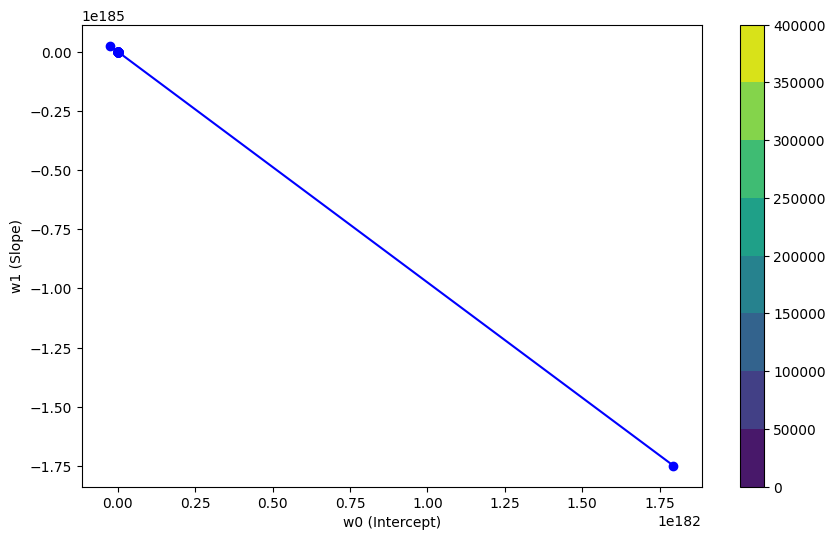

In [96]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50
w1 = 3.5  
w2 = 0.02 
y = w1 * x1 + w2 * x2 
X=np.column_stack((x1,x2))



w,trajectory=GD_multi(X,y,iter=100,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1,x2, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()


In [97]:
def z_score_scaling(data):
    mean = np.mean(data,axis=0)
    std_dev = np.std(data,axis=0)
    scaled_data = (data-mean)/std_dev
    return scaled_data
    

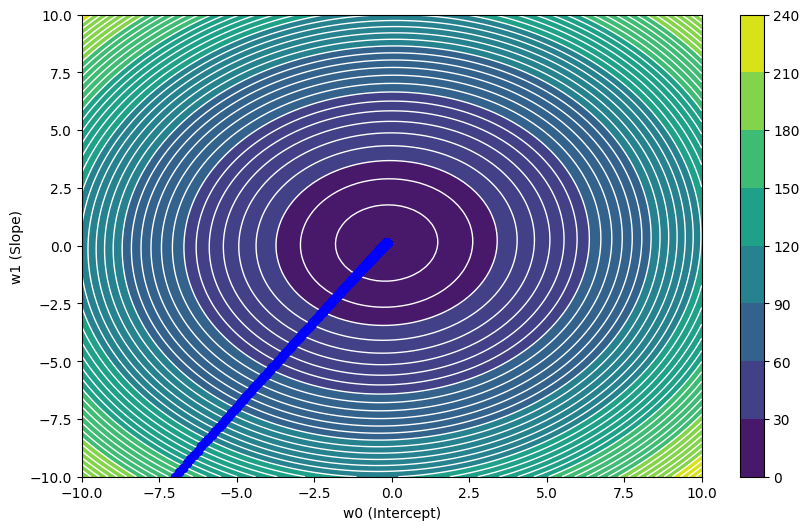

In [98]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)

X=np.column_stack((x1_scaling,x2_scaling))



w,trajectory=GD_multi(X,y,iter=500,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()


In [99]:
def Mean_Normal(data):    
    mean = np.mean(data, axis=0)
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)    
    normalized_data = (data - mean) / (max_val - min_val)
    
    return normalized_data

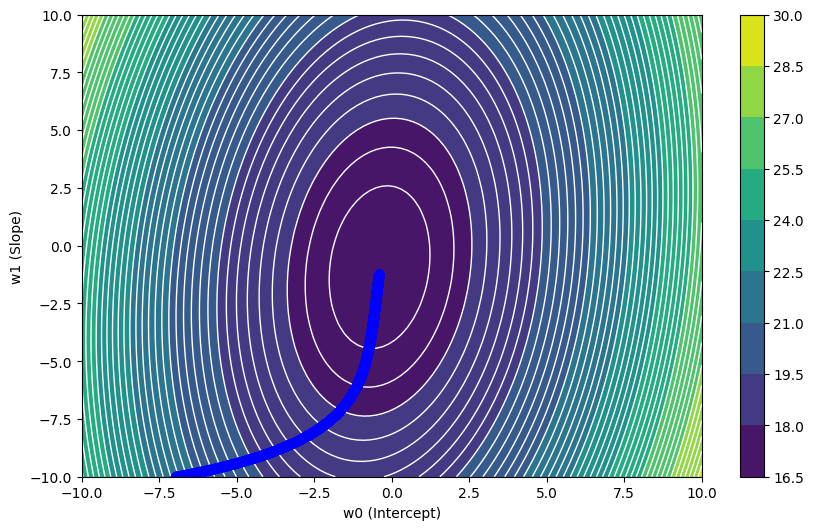

In [100]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=Mean_Normal(x1)
x2_scaling=Mean_Normal(x2)

X=np.column_stack((x1_scaling,x2_scaling))

w,trajectory=GD_multi(X,y,iter=10000,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

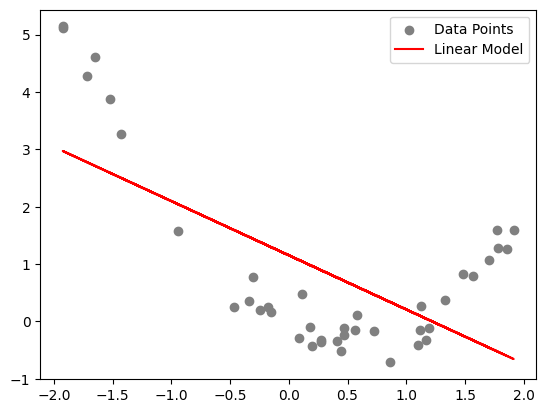

In [108]:
np.random.seed(0)
x = np.random.rand(40, 1) * 4 - 2  
y = x**2 - x + np.random.randn(40, 1) * 0.3  
x_test = np.linspace(-2, 2, 100).reshape(-1, 1)
plt.scatter(x,y,label="Data Points",color='gray')

linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred = linear_model.predict(x)

plt.plot(x,y_pred,label="Linear Model",color="red")

plt.legend()
plt.show()

In [102]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
X_poly2

array([[ 0.19525402,  0.03812413],
       [ 0.86075747,  0.74090341],
       [ 0.4110535 ,  0.16896498],
       [ 0.17953273,  0.032232  ],
       [-0.3053808 ,  0.09325743],
       [ 0.58357645,  0.34056148],
       [-0.24965115,  0.0623257 ],
       [ 1.567092  ,  2.45577735],
       [ 1.85465104,  3.43973049],
       [-0.46623392,  0.21737407],
       [ 1.16690015,  1.36165597],
       [ 0.11557968,  0.01335866],
       [ 0.27217824,  0.074081  ],
       [ 1.70238655,  2.89811998],
       [-1.71585577,  2.94416101],
       [-1.6514828 ,  2.72739544],
       [-1.91912641,  3.68304618],
       [ 1.33047938,  1.77017539],
       [ 1.112627  ,  1.23793885],
       [ 1.48004859,  2.19054384],
       [ 1.91447337,  3.66520828],
       [ 1.19663426,  1.43193354],
       [-0.15408255,  0.02374143],
       [ 1.12211671,  1.2591459 ],
       [-1.5269023 ,  2.33143062],
       [ 0.55968409,  0.31324628],
       [-1.42658685,  2.03515004],
       [ 1.77867567,  3.16368713],
       [ 0.08739329,

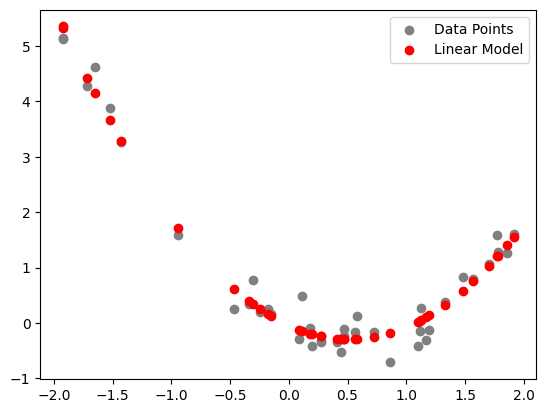

In [109]:
poly = PolynomialFeatures(2,include_bias=False)
X_poly2=poly.fit_transform(x)
plt.scatter(x,y,label="Data Points",color='gray')

linear_model = LinearRegression()
linear_model.fit(X_poly2,y)
y_pred = linear_model.predict(X_poly2)

plt.scatter(x,y_pred,label="Linear Model",color="red")

plt.legend()
plt.show()

(100, 1)


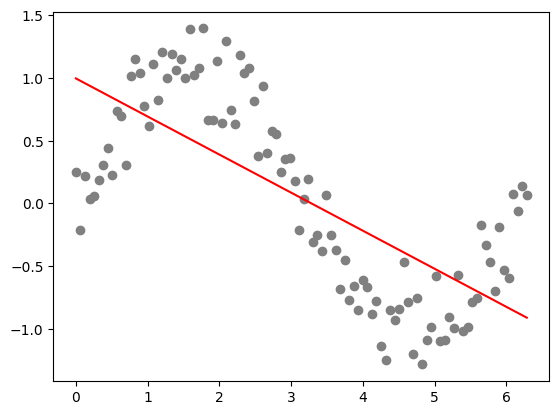

In [110]:
import math
n=100
x=np.linspace(0,2*math.pi,n).reshape(-1,1)

y=np.sin(x)+ 0.22 * np.random.randn(len(x)).reshape(-1,1)
print(x.shape)
linear_model = LinearRegression()

linear_model.fit(x,y)
y_pred=linear_model.predict(x)
plt.scatter(x,y,label="Data" , color="gray")
plt.plot(x,y_pred,label="Pred" , color="red")
plt.show()

(100, 1)


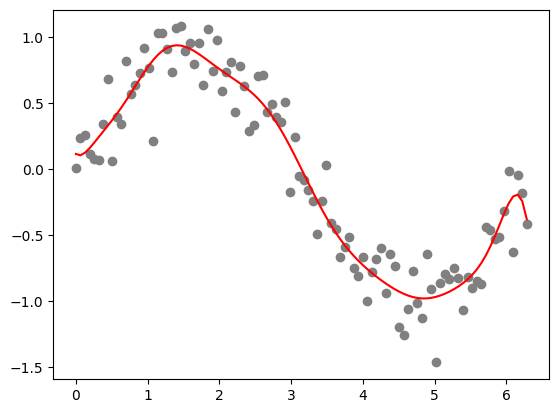

In [115]:
n=100
x=np.linspace(0,2*math.pi,n).reshape(-1,1)
poly = PolynomialFeatures(15,include_bias=False)
X_poly2=poly.fit_transform(x)
y=np.sin(x)+ 0.22 * np.random.randn(len(x)).reshape(-1,1)
print(x.shape)
linear_model = LinearRegression()

linear_model.fit(X_poly2,y)
y_pred=linear_model.predict(X_poly2)
plt.scatter(x,y,label="Data" , color="gray")
plt.plot(x,y_pred,label="Pred" , color="red")
plt.show()